In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
import scipy
import GPy
import plot

In [3]:
def f(x):
    x = np.array(x)
    x = x/2
    return np.cos(x*20) + np.sin(x*2*np.pi - 10*x**2) - 3*x**4

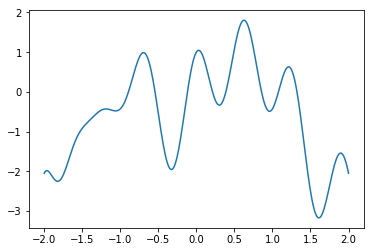

In [122]:
x = np.linspace(-2, 2, 300)
xopt = x[np.argmax(f(x))]
plt.plot(x, f(x))

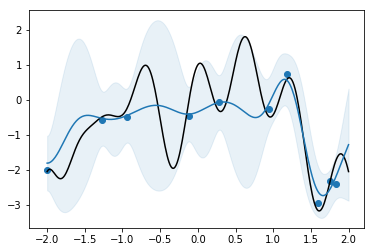

In [143]:
np.random.seed(2)
xsamp = np.random.choice(np.linspace(-2, 2), 10, replace=False)

ystd = .2
ysamp = f(xsamp) + scipy.stats.norm(0, ystd).rvs(size=len(xsamp))

m = GPy.models.GPRegression(np.array(xsamp)[:,None], np.array(ysamp)[:,None], GPy.kern.RBF(1))
m.optimize()

plt.plot(x, f(x), 'k')
plt.scatter(xsamp, ysamp)
plot.interval(x[:,None], *m.predict_noiseless(x[:,None]))

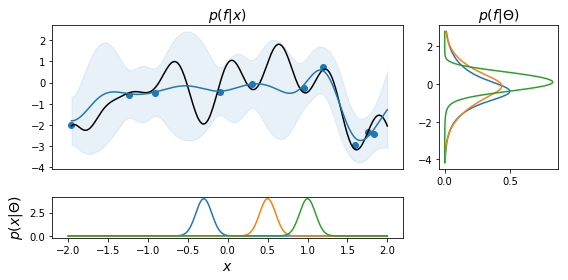

In [144]:
plt.figure(figsize=(8, 4))

plot.marginals(x[:,None], f(x), xsamp, ysamp, m, 
               px=[
                   scipy.stats.norm(-.3, .1),
                   scipy.stats.norm(.5, .1),
                   scipy.stats.norm(1, .1)
               ],
               d2=2, fs=14)

plt.tight_layout()

plt.savefig('figures/stochastic-sampling-early.png', dpi = 300)

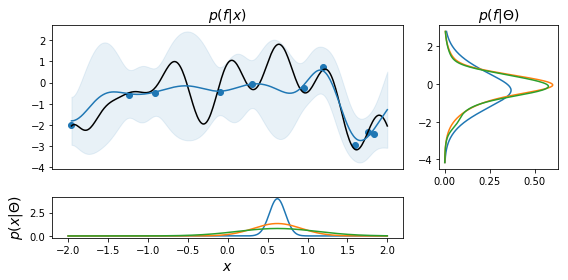

In [145]:
plt.figure(figsize=(8, 4))

plot.marginals(x[:,None], f(x), xsamp, ysamp, m, 
               px=[
                   scipy.stats.norm(xopt, .1),
                   scipy.stats.norm(xopt, .3),
                   scipy.stats.norm(xopt, .5)
               ],
               d2=2, fs=14)

plt.tight_layout()

plt.savefig('figures/stochastic-sampling-early-variance.png', dpi = 300)

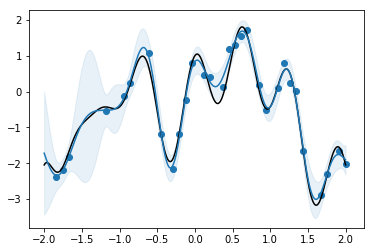

In [146]:
np.random.seed(1)
xsamp = np.random.choice(np.linspace(-2, 2), 30, replace=False)

ystd = .2
ysamp = f(xsamp) + scipy.stats.norm(0, ystd).rvs(size=len(xsamp))

m = GPy.models.GPRegression(np.array(xsamp)[:,None], np.array(ysamp)[:,None], GPy.kern.RBF(1))
m.optimize()

plt.plot(x, f(x), 'k')
plt.scatter(xsamp, ysamp)
plot.interval(x[:,None], *m.predict_noiseless(x[:,None]))

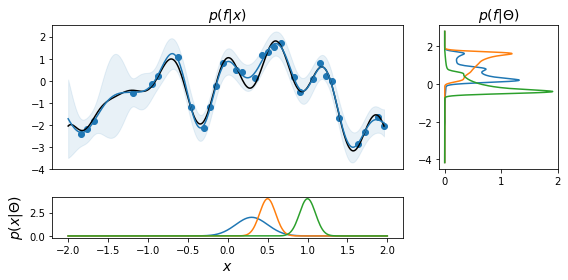

In [154]:
plt.figure(figsize=(8, 4))

plot.marginals(x[:,None], f(x), xsamp, ysamp, m, 
               px=[
                   scipy.stats.norm(.3, .2),
                   scipy.stats.norm(.5, .1),
                   scipy.stats.norm(1, .1)
               ],
               d2=2, fs=14, marginal_kwargs = dict(T=50000))

plt.tight_layout()

plt.savefig('figures/stochastic-sampling-late.png', dpi=300)

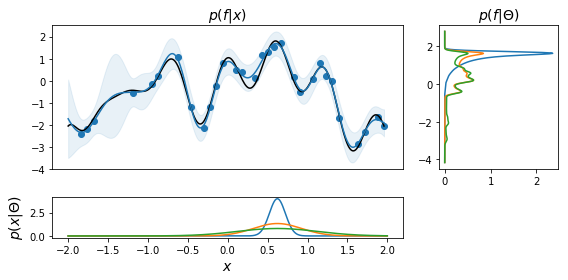

In [156]:
plt.figure(figsize=(8, 4))

plot.marginals(x[:,None], f(x), xsamp, ysamp, m, 
               px=[
                   scipy.stats.norm(xopt, .1),
                   scipy.stats.norm(xopt, .3),
                   scipy.stats.norm(xopt, .5)
               ],
               d2=2, fs=14, marginal_kwargs = dict(T=50000))

plt.tight_layout()

plt.savefig('figures/stochastic-sampling-late-variance.png', dpi=300)